<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter03_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다중 회귀(Multiple Regression)**

여러 개의 특성을 사용한 선형 회귀를 다중 회귀라고 부른다.

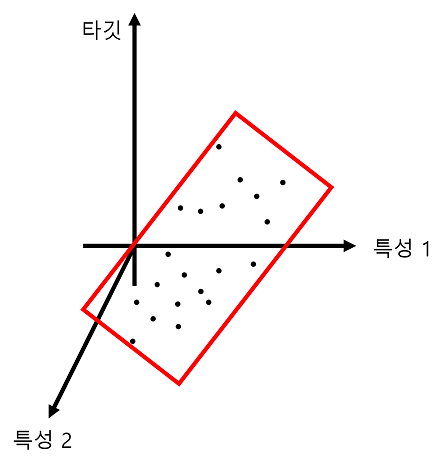

1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 2차원 공간의 직선이었다.

-> 직선의 방정식  타깃 = a * 특성 + 절편

2개의 특성을 사용하면 선형 회귀는 3차원 공간의 평면을 학습한다.

-> 평면의 방정식 타깃 = a * 특성1 + b * 특성2 + 절편

특성이 늘어남에 따라 고차원의 초평면을 학습한다.

※ 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현할 수 있다. 기능이 막강해지고, 그러다보니 선형회귀의 높은 능력을 억제해야하는 문제도 생긴다.

# **특성 공학(Feature Engineering)**

이번 예제에서는 농어의 길이뿐만아니라 농어의 높이와 두께, 특성 3개를 사용한다.

이전 예제에서처럼 3개의 특성을 각각 제곱한다.

거기에 추가로 각 특성을 서로 곱해서 또 다른 특성을 만들 것이다.

이렇게 기존의 특성을 사용해 특성을 변경하거나 조합하거나 새로운 특성을 만들어내는 작업을 특성 공학이라고 한다.

In [ ]:
import pandas as pd

판다스는 파이썬 과학 라이브러리의 핵심 요소 중 하나로 데이터 분석 라이브러리이다.

-> 과학 라이브러리 :  scipy, pandas, numpy, matplotlib, scikit-learn

---

판다스의 핵심 데이터 구조, 핵심 객체는 데이터프레임(DataFrame)이다.

이 데이터프레임은 4차원 배열이다.

넘파이와 다르게 다른 종류의 데이터 타입을 받을 수 있다.

넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능을 제공한다.

이전과 똑같이 샘플 데이터가 행에, 특성 데이터가 열에 있다.

다만 여러 종류의 데이터를 섞어서 사용할 수 있는 장점이 있다.

또, 판다스에는 데이터를 만드는 파일이나 인터넷에서 불러와서 새로 만드는 이런 기능도 풍부하다.

간단한 통계치를 만드는 기능도 많고, 그래프로 만드는 visualization해주는 기능도 많다.

또, 데이터프레임은 넘파이 배열로 쉽게 바꿀 수 있다.

---

이번 예제에서는 판다스로 원격(인터넷)에 있는 파일(데이터)을 불러와서 데이터프레임에 저장하겠다. 

그 다음 넘파이 배열로 변환하여 선형 회귀 모델을 훈련해 볼 것이다.

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

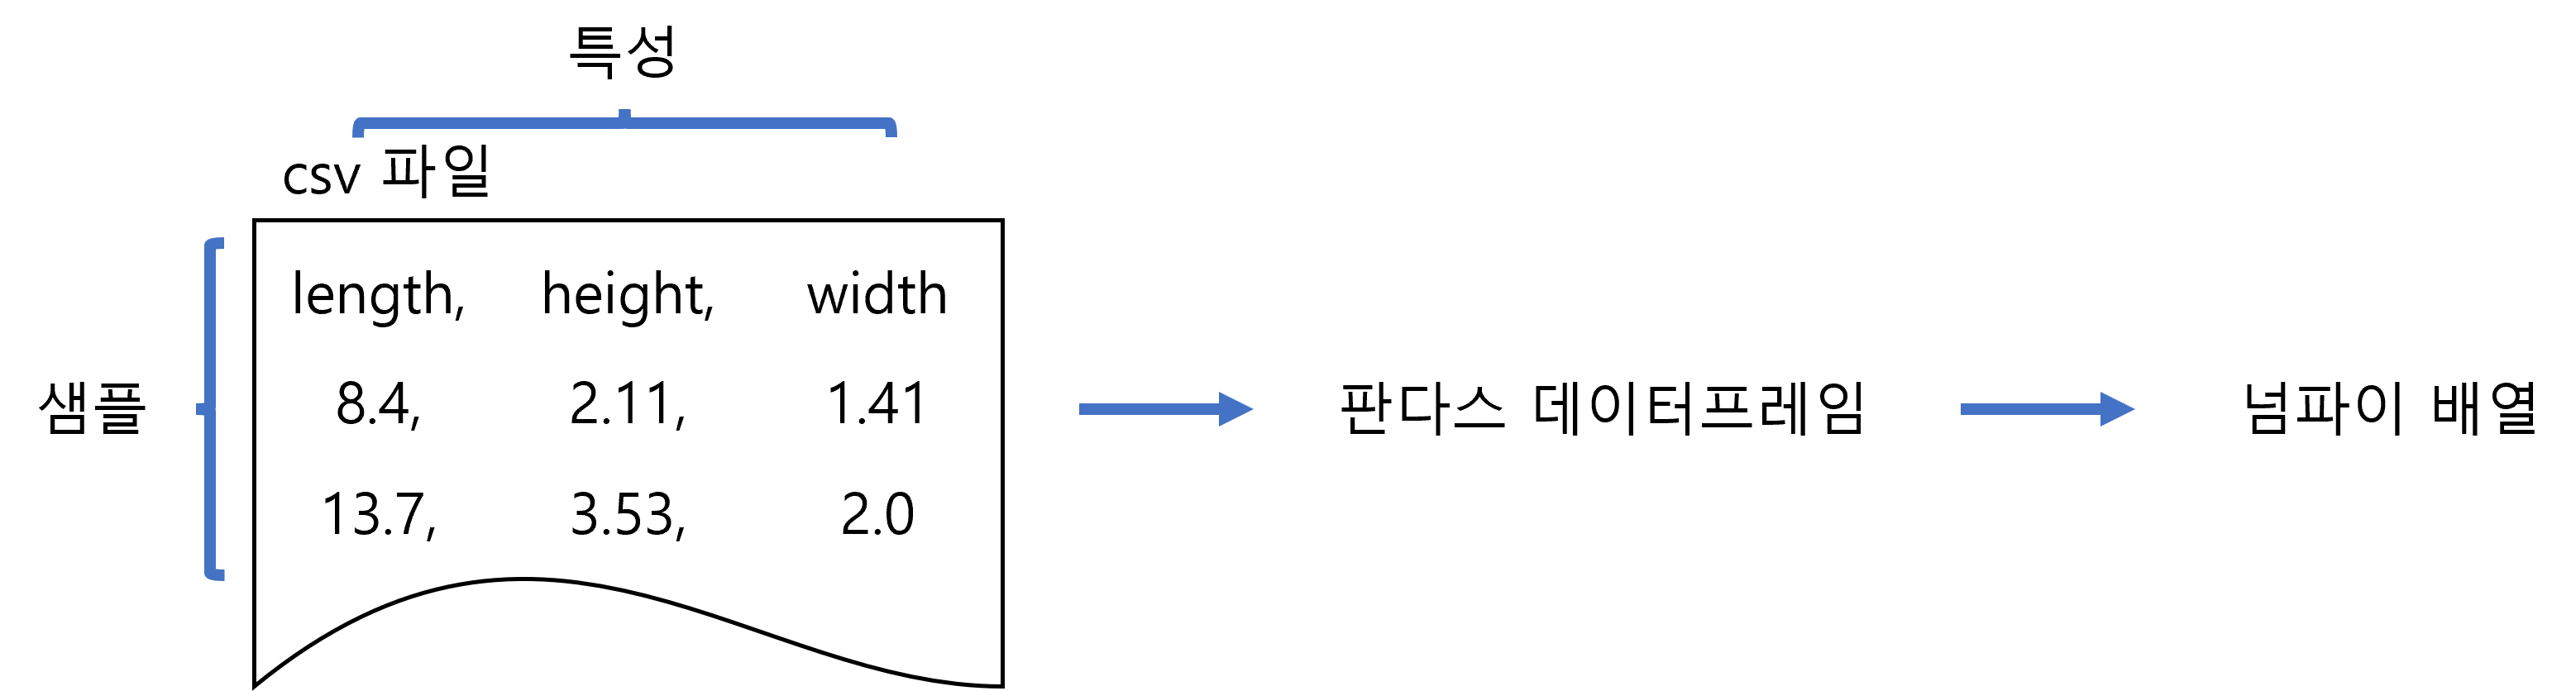

판다스 데이터 프레임을 만들기 위해 많이 사용하는 파일은 CSV파일이다.

CSV파일은 위의 그림처럼 콤마로 나누어져 있는 텍스트 파일이다.

우리가 사용하는 CSV파일은 각 행에 샘플이 있고, 콤마로 나누어져 있는 각 열마다 특성이 있다.

---

CSV파일은 미리 만들어 놓았는데 인터넷 주소: https://bit.ly/perch_csv_data에 올려놓았다.

판다스의 read_csv() 함수에 주소를 넣어 사용하면 주소의 csv파일을 다운로드 받아서 csv파일을 읽은 다음 자동으로 판다스의 데이터프레임으로 만들어준다.

그리고 csv파일의 첫 번째 행은 제목행인데 판다스의 read_csv() 함수는 이것을 자동으로 인식해서 첫 번째 행을 이름으로 사용하고, 두 번째 행부터 실제 데이터로 사용한다.

---

판다스 데이터프레임을 만들면 그 다음은 넘파이 배열로 변환해야한다.

넘파이배열로 바꿀 때는 판다스의 to_numpy() 메소드를 호출하면 된다.

그러면 객체가 생성되고, 그 객체는 이전에 column_stack으로 만든 넘파이 배열과 똑같다.

---

이후부터는 위에서 만든 넘파이 배열과 타깃값을 이용해서 사이킷런의 train_test_split를 이용해서 훈련 세트와 테스트 세트로 나눈다.

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# **다항 특성 만들기**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다.

사이킷런에서는 이런 클래스를 변환기(transformer)라고 부른다.

앞서 배운 LinearRegression 같은 사이킷런의 모델 클래스는 추정기(estimator)라고도 부른다.

변환기에는 fit(), transform() 메소드가 있고, 추정기에는 fit(), score(), predict() 메소드가 있다.

---

다항 특성을 만드는 변환기는 사이킷런의 preprocessing 패키지 하위에 PolynomialFeatures 클래스이다.

In [ ]:
# degree=2
poly = PolynomialFeatures()
poly.fit([[2, 3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


클래스의 객체를 만들고, fit()메소드를 호출한다.

그리고 2개의 특성 2와 3으로 이루어진 가상의 샘플 데이터를 transform()메소드를 적용했다.

---

PolynomialFeatures 클래스에서 fit()메소드는 실제로 학습하는 것은 아니다. 

특성이 몇 개가 있고, 곱해서 어떤 조합으로 만들어야겠구나 같은 것을 파악하는 역할이다.

즉, fit()메소드는 새롭게 만들 특성 조합을 찾는다.

transform()메소드는 실제로 데이터를 변환한다.

---

※ 여기서 잠깐 ※

fit()메소드, 훈련을 해야 transform()메소드, 변환이 가능하다.

즉, transform() 메소드를 사용하기 전에 fit()메소드를 사용해야한다.

사이킷런의 일관된 api때문에 두 단계로 나뉘어져 있다.

두 메소드를 하나로 붙인 fit_transform 메소드도 존재한다.

---

PolynomialFeatures() 클래스에는 default는 2로 제곱항을 만드는 degree라는 매개변수가 있다.

이 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다.

만약 degree가 3이라면 2제곱뿐만아니라 3제곱도 만든다.

---

2와 3은 원래 있던 특성을 그대로 사용하고, 2와 3을 각기 제곱해서 4와 9를 만들었고, 2와 3을 곱한 6을 만들었다.

1은 사실 절편을 위한 특성이다.

무게 = a * 길이 + b * 높이 + c * 두께 + d * 1

이 식을 보면 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다.

이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1)이 된다.

하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없다.

In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

PolynomialFeatures(include_bias=False로 지정하면 절편을 위한 항이 제거되고 특성의 제곱과 특성끼리 곱한 항만 추가된다.

---

※ 여기서 잠깐 ※

사실 inculde_bias=False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시한다.

In [ ]:
print(train_poly.shape)

(42, 9)


넘파이의 shape속성을 사용하면 배열의 크기를 확인할 수 있다.

42개의 샘플이 있고, 3개의 특성이 9로 늘어난 것을 알 수 있다.

In [ ]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

poly객체의 get_feature_names() 메소드를 호출하면 각 특성이 각각 어떤 입력의 조합으로 만들어졌는지 확인할 수 있다.

'x0'은 첫 번째 특성을 그대로 사용한 것이고, 'x1'은 두 번째 특성을 그대로 사용한 것이다.

'x0^2'은 첫 번째 특성의 제곱, 'x0 x1'은 첫 번째 특성과 두 번째 특성의 곱을 나타낸다.

In [ ]:
test_poly = poly.transform(test_input)

테스트 세트도 변환하였다.

---

※ 여기서 잠깐 ※

사실 PolynomialFeatures 클래스는 fit()메소드에서 만들 특성의 조합을 준비하기만 하고 별도의 통계 값을 구하지 않는다.

따라서 새로운 객체를 만들어서 테스트 세트를 따로 변환해도 된다.

하지만 앞장에서 설명했듯이 항상 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들이는 것이 좋다.

# **다중 회귀 모델 훈련하기**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594132


농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 추가했다.

테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 과소적합 문제는 사라졌다.

왜냐하면 특성이 늘어나면서 훈련 세트에 잘 맞는 복잡한 모델이 만들어졌기 때문이다.

---

테스트 세트에 대한 점수를 높이기 위해서 특성을 더 많이 추가해보겠다.

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
print(train_poly.shape)

(42, 55)


degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있다.

degree = 5로 지정해서 5제곱까지 특성을 만들었다.

---

특성의 개수가 55개로 늘어난 것을 볼 수 있다.

In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [ ]:
print(lr.score(test_poly, test_target))

-144.40579242335605


훈련 세트는 거의 완벽한 점수를 얻었다.

하지만 테스트 세트는 음수로 굉장히 안좋은 점수를 얻었다.

이렇게 된 이유는 과대적합때문이다.

---

특성의 개수를 늘리면 선형 모델은 점점 강력해진다. 

훈련 세트에 대해 거의 완벽하게 학습할 수 있다.

하지만 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 얻는다.

---

이렇게 된 이유는 샘플의 개수보다 특성의 개수가 더 많기 때문에 과대적합이 발생할 수 밖에 없기 때문이다.

훈련 세트의 샘플 개수는 42개고, 특성이 55개이다.

42개의 샘플을 55개의 특성으로 훈련하면 완벽하게 학습할 수 있는 것이 당연하다.

예를 들어 42개의 참새를 맞추기 위해 딱 한 번 새총을 쏴야 한다면 참새 떼 중앙을 겨냥하여 가능한 한 맞출 가능성을 높여야 한다.

하지만 55번이나 쏠 수 있다면 한 번에 하나씩 모든 참새를 맞출 수 있다.

# **규제(Regularization)**

규제는 모델이 훈련 세트에 과대적합되지 않도록 만드는 기법이다.

선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 가중치, 기울기)의 크기를 작게 만드는 일이다.

이전에 k-최근접 이웃을 했을 때 특성의 scale이 정규화되지 않으면 scale이 큰 특성에 절대적으로 영향을 받아서 잘못된 이웃을 찾았다.

선형 회귀에서는 scale을 정규화하지 않았다다.

왜냐하면 사이킷런의 LinearRegression 클래스는 특성의 scale에 영향을 받지 않는 알고리즘을 구현되어있다.

하지만 규제를 하려고 하면 상황이 달라진다.

---

선형 회귀 모델에서 규제를 적용할 때 기울기가 서로 많이 다르면 공정하게 제어되지 않을 것이다.

만약 특성의 scale이 다르면 특성에 곱해지는 기울기가 달라진다.

그러므로 특성의 scale이 비슷해져야지 특성에 곱해지는 기울기도 비슷해진다.

즉, 규제를 적용하기 전에 특성의 scale을 정규화해야한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

대표적으로 가장 많이 사용하는 정규화 방법이 평균과 표준편차를 구해서 특성을 표준 점수로 바꾸는 것이다.

이전에는 넘파이의 mean()과 std()함수를 사용해서 수동으로 변환해서 표준 점수를 변환했다.

이번에는 사이킷런의 preprocessing 패키지 하위의 StandardScaler 클래스를 사용해서 변환했다.

---

PolynoimalFeatures 클래스와 동일하게 객체를 생성하고, fit()메소드로 훈련한 다음 transform()메소드로 데이터를 변환한다.

훈련 세트에 있는 통계값을 사용한다.

평균과 표준편차를 이용하기 때문에 반드시 훈련 세트에 적용한 StandardScaler 객체를 사용해서 테스트 세트도 변환해야한다.

---

StandardScaler 객체를 만들고, PolynomialFeatures 클래스로 만든 train_poly를 사용해 이 객체를 훈련한다.

그 다음에 train_poly와 test_poly를 transform() 메소드로 변환한다.

여기에서도 다시 한번 강조하지만 꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 한다.

---

이제 표준점수로 변환한 train_scaled와 test_scaled가 준비되었다.

선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부른다.

릿지는 기우기를 제곱한 값을 기준으로 규제를 적용한다.

라쏘는 기울기의 절댓값을 기준으로 규제를 적용한다.

일반적으로 릿지를 더 선호하고, 두 알고리즘 모두 기울기의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있다.

---

릿지와 라쏘 모두 사이킷런의 linear_model 패키지 안에 있다.

# **릿지 회귀(Ridge Regression)**

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615398


사이킷런의 linear_model 패키지 하위의 Ridge 클래스를 임포트해서 모델 객체를 만들고, fit()메소드에 train_scaled 데이터를 전달해서 훈련한다.

그 다음 score() 메소드로 평가한다.

사이킷런 모델을 사용할 때 편리한 점은 훈련하고 사용하는 방법이 항상 같다는 것이다.

---

많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 얻었다.

Ridge 클래스가 규제하는 방법은 가중치의 제곱을 벌칙으로 사용한다.

선형 회귀가 아닌 다른 모델에서는 L2규제라고도 부른다.

---

릿지 모델은 규제의 양(강도)를 임의로 조절할 수 있다.

모델 객채를 만들 때 alpha 매개변수로 규제의 강도를 조절한다.

default값은 1이다.

alpha 값이 크면 규제 강도가 세지므로 기울기 값을 더 줄이고 조금 더 과소적합되도록 유도한다.

alpha 값이 작으면 규제 강도가 작아지므로 기울기를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

---

※ 여기서 잠깐 ※

alpha 값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값이다.

이렇게 머신러닝 모델이 학습할 수 없고 사람이 알려줘야하는 파라미터를 하이퍼파라미터(hyperparameter)라고 부른다.

사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메소드의 매개변수로 표현된다.

이 책에서는 함수와 클래스의 파라미터는 매개변수라고 하고 모델과 관련된 파라미터(모델 파라미터, 하이퍼파라미터)는 그대로 파라미터라고 표현했다.

현재 사용한alpha 값이 이 모델에서 최적인지 알 수 없다. 

그래서 적절한 alpha 값을 찾아야 한다.

이런 alpha값을 찾는, 하이퍼파라미터를 찾는 과정을 하이퍼파라미터 탐색이라고 부른다.

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

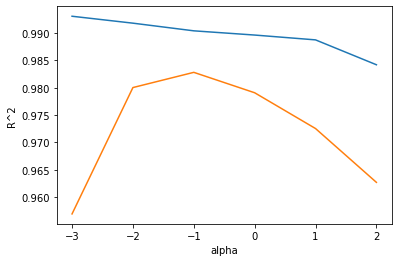

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

최적의 alpha값을 찾는 간단한 방법은 alpha 값이 여러 개 들어있는 리스트를 만들어서 for문을 돌리면서 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 리스트에 저장한다.

그 후에 alpah 값에 대한 R^2값의 그래프를 그려서 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점의 최적의 alpah 값을 찾으면 된다.

---

우선 alpha 값을 0.001에서 100까지 10의 배수로 리스트에 저장했다.

보통 하이퍼파라미터 탐색을 할 때 하이퍼파라미터를 상형 로그 스케일로 테스트하는 것이 일반적인 패턴이다.

그리고 alpha 값을 0.001부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 그래프 왼쪽 이 촘촘해진다.

alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해  넘파이의 log10() 함수를 사용해서 로그 함수로 바꾸어 지수로 표현했다.

---

그래프를 보면 alpha값이 증가함에 따라 규제가 커지면서 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합이 발생했다.

그래프를 보면 alpha값이 감소함에 따라 규제가 작아지면서 훈련 세트는 점수가 높지만 테스트 세트의 점수가 낮아지면서 점수 차이가 커졌다.

훈련 세트에는 잘 맞고 테스트 세트에는 형편 없는 과대적합이 발생했다.

---

적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 10^-1 = 0.1 이다.

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


alpha 값을 0.1로 전달하고 훈련했다.

훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 이루고 있다.

이 하이퍼파라미터 alpha 값이 0.1이 이 모델에서 최적이라는 것을 알 수 있다.

# **라쏘 회귀(Lasso Regression)**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9897898972080961


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


사이킷런의 linear_model 패키지 하위의 Lasso 클래스를 임포트해서 라쏘 회귀를 사용할 수 있다.

---

Lasso 클래스가 규제하는 방법은 가중치의 절대값을 벌칙으로 사용한다.

선형 회귀가 아닌 다른 모델에서는 L1규제라고도 부른다..

---

라쏘 모델도 규제의 양(강도)를 조절할 수 있다.

릿지 모델과 마찬가지로 모델 객채를 만들 때 alpha 매개변수로 규제의 강도를 조절한다.

동일하게 default값도 1이다.

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


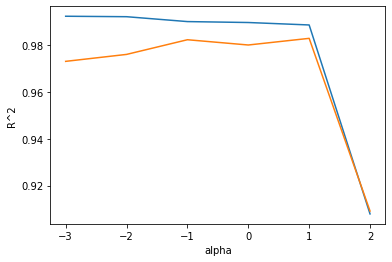

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

하이퍼파라미터 탐색, 최적의 alpha값을 찾기 위해서 릿지회귀와 마찬가지로 alpha 값이 여러 개 들어있는 리스트를 만들고, for문을 돌려서 라쏘 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 리스트에 저장했다.

그 후에 alpah 값에 대한 R^2값의 상용로그 함수를 이용해서 그래프를 그렸다.

---

똑같이 alpha값이 커지면 규제가 강해져서 과소적합을 보이고, 작아지면 규제가 약해져서 과대적합을 보였다.

라쏘 모델에서 최적의 alpha값은 1, 즉 10^1 = 10이다.

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


alpha 값을 1로 전달하고 훈련했다.

릿지와 마찬가지로 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 이루고 있다.

이 하이퍼파라미터 alpha 값이 1이 이 모델에서 최적이라는 것을 알 수 있다.

In [ ]:
print(np.sum(lasso.coef_ == 0))

40


일반적으로 라쏘보다는 릿지, L1규제보다는 L2규제를 조금 더 선호하는 편으로 L2 규제가 조금 더 효과적이다.

그리고 라쏘 회귀의 특징은 일부 특성을 가중치를 아예 0으로 만들어서 완전히 사용안할 수도 있다.

---

라쏘 모델이 학습한 가중치는 객체의 coef_ 속성에 저장되어있다.

사용안한 특성을 찾으려면 coefficient가 0인 개수를 찾으면 된다.

---

55개의 특성을 모델에 주입했지만 40개는 사용하지 않았고, 라쏘 모델이 사용한 특성은 15밖에 되지 않았다.

이런 특징떄문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있다.

---

※ 여기서 잠깐 ※

np.sum() 함수는 배열을 모두 더한 값을 반환한다.

넘파이 배열에 비교 연산자를 사용했을 때 각 원소는 True 또는 False가 된다.

np.sum() 함수는 True를 1로, False를 0으로 인식하여 덧셈을 할 수 있기 때문에 마치 비교 연산자에 맞는 원소 개수를 헤아리는 효과를 낸다.